**H4.1:**

(a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from timeit import default_timer as Timer

In [2]:

def formatImage(x):
    R = x[0,:].reshape(4032, 3024)
    G = x[1,:].reshape(4032, 3024)
    B = x[2,:].reshape(4032, 3024)
    temp = np.dstack((R,G))
    temp = np.dstack((temp,B))
    return temp

def distFunc(x, mu, norm = "L2"):
    totDistance = np.zeros((mu.shape[1],x.shape[1]))
    if (norm == "L1"):
        for i in range(mu.shape[1]):
            totDistance[i,:] = np.sum(np.abs(x.transpose()- mu[:,i]).transpose() ,axis = 0)
    else:
        for i in range(mu.shape[1]):
            diff = (x.transpose()- mu[:,i]).transpose()
            totDistance[i,:] = np.sqrt(np.sum(diff**2 ,axis = 0))
    #print(totDistance)
    return totDistance

def calculateCentroid(x, labels, norm = "L2"):
    prevLabels = np.unique(labels)
    mu = np.zeros((3,prevLabels.size))
    
    if (norm == "L1"):
        for i in range(prevLabels.size):
            mu[:,i] = np.median(x[:,labels == prevLabels[i]],axis = 1) 
    
    else:
        for i in range(prevLabels.size):
            mu[:,i] = np.mean(x[:,labels == prevLabels[i]],axis = 1) 
    #print(mu)
    return mu
        
def replacePixels(x, mu, labels):
    prevLabels = np.unique(labels)
    x_new = np.copy(x)
    #print(x_new.shape)
    for i in range(prevLabels.size):
        x_new[:,labels == prevLabels[i]] = mu[:,i].reshape(3,1)
    return x_new
        
        
def calculateLabel(x,mu,k, norm = "L2"): #returns calculated label
    distance = distFunc(x,mu,norm=norm)
    labels = np.argmin(distance, axis = 0)
    return labels

def KMeans(x, k, norm = "L2"): #returns clustered image
    x_temp = np.copy(x)
    temp = np.random.choice(x.shape[1],k)
    mu = np.copy(x[:,temp])   # choose existing pixel as centroid to avoid less than K clusters
    #mu_past = np.copy(mu)
    while True:
        labels = calculateLabel(x,mu,k, norm = norm)
        mu_past = np.copy(mu)
        mu = calculateCentroid(x, labels, norm = norm)
        #print("mu:",mu,"\npast mu:",mu_past)
        #print(np.sum(np.abs(mu.astype(int)-mu_past.astype(int))))
        if (np.sum(np.abs(mu.astype(int)-mu_past.astype(int)))==0):
            x_temp = replacePixels(x,mu,labels)
            break
    
    image = formatImage(x_temp)
    return image
    

In [3]:
img = plt.imread("selfie.jpg")
img = ndimage.rotate(img,-90)
#plt.imshow(img)
x = np.copy(img.transpose(2,0,1).reshape(3,-1))

k = np.array([2,4,8,16])
vertical, horizontal, channels = img.shape
#print(vertical, horizontal, channels)
clusteredImage = np.zeros((vertical, horizontal, channels, k.size))
#print(clusteredImage.shape)


(b)

In [4]:
print("Time value in 'mm:ss'")
for i in range(k.size):
    start = timer()
    clusteredImage[:,:,:,i] = KMeans(x, k[i])
    end = timer()
    totTime = end - start
    print("Time to cluster with k = {}: {:02d}:{:02d}".format(k[i],int(totTime / 60),int(totTime % 60)))

Time value in 'mm:ss'
Time to cluster with k = 2: 00:13
Time to cluster with k = 4: 00:45
Time to cluster with k = 8: 02:40
Time to cluster with k = 16: 12:28


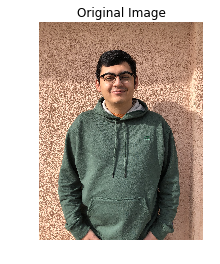

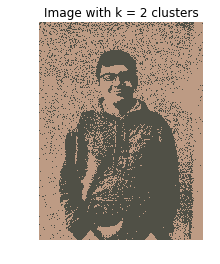

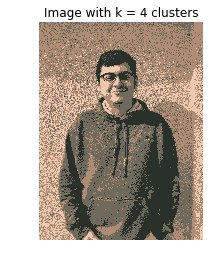

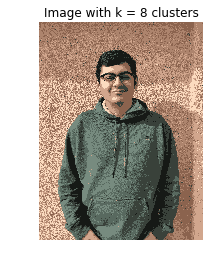

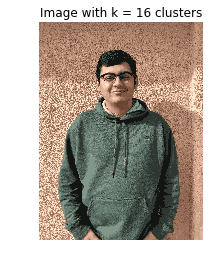

In [5]:
plt.figure()
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')
for i in range(k.size):
    plt.figure()
    plt.title("Image with k = {} clusters".format(k[i]))
    plt.imshow(clusteredImage[:,:,:,i]/255)
    plt.axis('off')

(c) Using K-Medians

In [6]:
print("Time value in 'mm:ss'")
for i in range(k.size):
    start = timer()
    clusteredImage[:,:,:,i] = KMeans(x, k[i], norm = 'L1')
    end = timer()
    totTime = end - start
    print("Time to cluster with k = {}: {:02d}:{:02d}".format(k[i],int(totTime / 60),int(totTime % 60)))

Time value in 'mm:ss'
Time to cluster with k = 2: 00:32
Time to cluster with k = 4: 01:28
Time to cluster with k = 8: 01:59
Time to cluster with k = 16: 03:09


In [7]:
print("{}".format(int(2.2)))

2


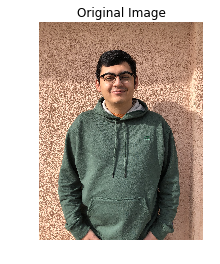

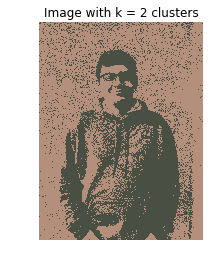

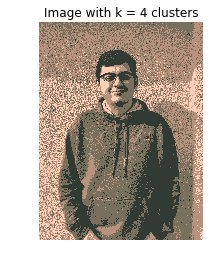

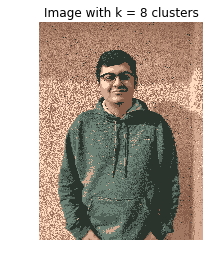

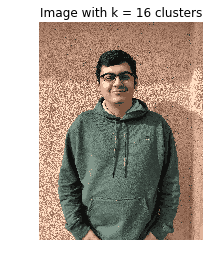

In [8]:
plt.figure()
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')
for i in range(k.size):
    plt.figure()
    plt.title("Image with k = {} clusters".format(k[i]))
    plt.imshow(clusteredImage[:,:,:,i]/255)
    plt.axis('off')

**4.2**

(a)

In [168]:
from sklearn import datasets, decomposition
dataset = sklearn.datasets.fetch_olivetti_faces()
label = np.zeros(400)
for i in range(400):
    label[i] = (i//10)
indx = np.random.choice(400,400, replace = False)

train = dataset.data[indx[:240],:]
train_label = label[indx[:240]]

test = dataset.data[indx[240:],:]
test_label = label[indx[240:]]

We need 4 components to get 50% of the energy.
80.46% energy is captured with the top 25 components.


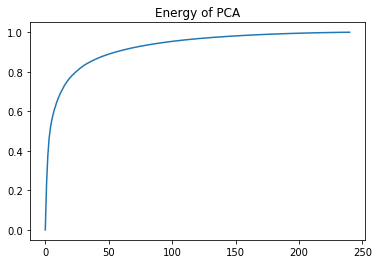

In [171]:

#print(train.shape,test.shape)
pca = sklearn.decomposition.PCA()
pca.fit(train)
energy = np.zeros(pca.explained_variance_ratio_.size+1)
#print(pca.explained_variance_ratio_)
for i in range(pca.explained_variance_ratio_.size+1):
    energy[i] = np.sum(pca.explained_variance_ratio_[:i])
plt.title("Energy of PCA")
plt.plot(energy)
print("We need {} components to get 50% of the energy.".format(energy[energy < .50].size))
print("{0:.2%} energy is captured with the top 25 components.".format(energy[25]))

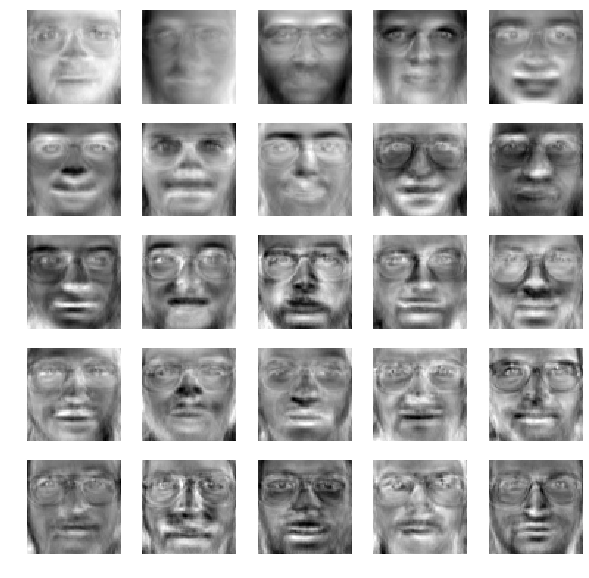

In [172]:
eigenfaces = pca.components_[:25]
plt.figure(figsize = (10,10))

for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(eigenfaces[i-1,:].reshape(64,64),cmap = 'gray')
    plt.axis('off')
plt.show()

(c)

In [277]:
avgTest = test - np.mean(train, axis = 0)

testProjection = np.matmul(eigenfaces, avgTest.T)
trainProjection = np.matmul(eigenfaces, (train - np.mean(train, axis = 0)).T)

classLabels = np.unique(train_label)
#trainProjection = np.zeros((25,classLabels.size))
#print((np.matmul(eigenfaces, (np.mean(train[train_label == 0,:],axis = 0) - np.mean(train, axis = 0)).T)).shape)
#for i in range(classLabels.size):
    #trainProjection[:,i] = np.matmul(eigenfaces, (np.mean(train[train_label == classLabels[i],:],axis = 0) - np.mean(train, axis = 0)).T)    
#print(trainProjection.shape)


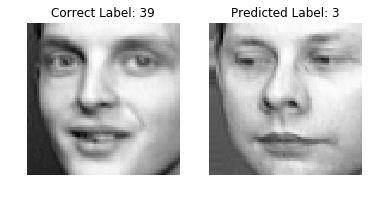

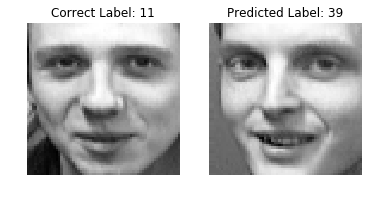

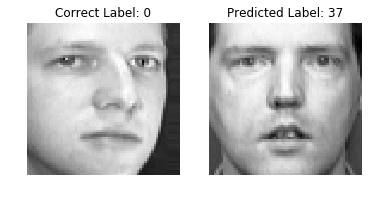

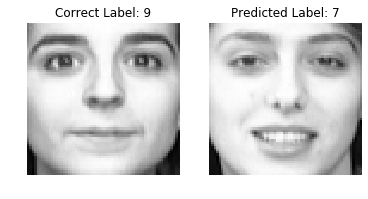

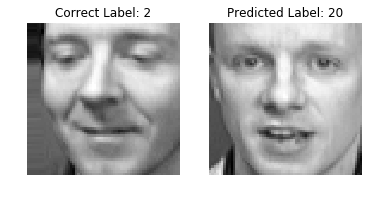

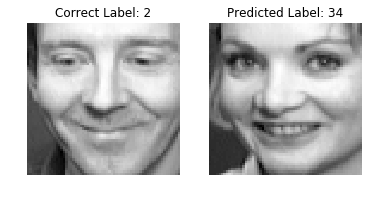

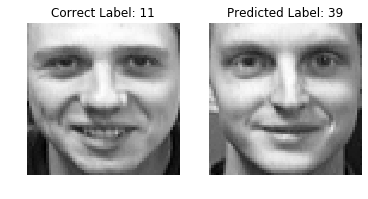

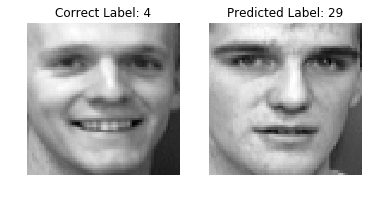

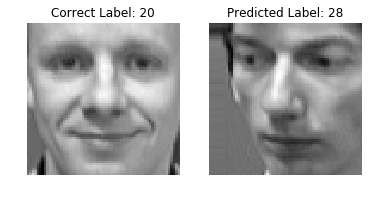

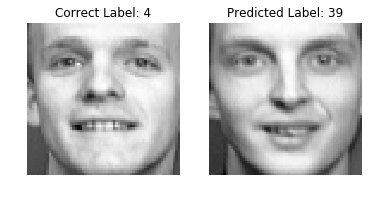

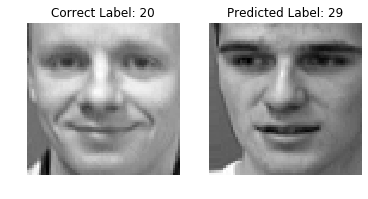

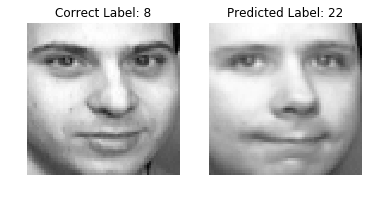

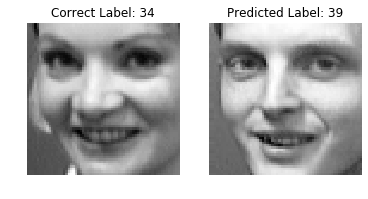

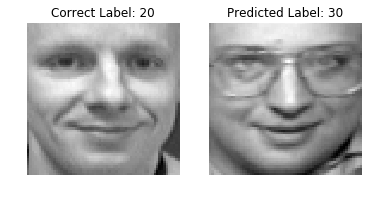

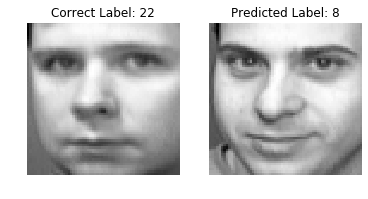

In [324]:
misclassified = []
for i in range(test.shape[0]):
    nearestTrain = np.argmin(np.linalg.norm(testProjection[:,i].reshape(25,1) - trainProjection,axis = 0))
    
    if (test_label[i] != train_label[nearestTrain]):
        misclassified.append([i,nearestTrain])
        
x, y = np.shape(misclassified)

for i in range(1,x+1,2):
    #print(i)
    plt.figure()
    plt.subplot(1,2,1)
    plt.title("Correct Label: {}".format(int(test_label[misclassified[i][0]])))
    plt.imshow(test[misclassified[i][0],:].reshape(64,64),cmap='gray')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title("Predicted Label: {}".format(int(train_label[misclassified[i][1]])))
    plt.imshow(train[misclassified[i][1],:].reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()

In [329]:
print("The mean accuracy is {:.2%}.\nThere are {} misclassified test images.".format(1-x/160,x))

The mean accuracy is 81.25%.
There are 30 misclassified test images.


It seems that most of the misclassified images could all very well be mistaken at first glance by a human. For a couple I had to make sure that the images were not of the same class like the correct label 8 vs predicted label 22. 